In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

In [96]:
# Set plots style
plt.style.use('seaborn-v0_8-paper')

### Ground Truth Simulation

In [29]:
# Confusion matrix values
TP = 273
FP = 37
FN = 52
TN = 1190

# Total number of samples
total_samples = TP + FP + FN + TN

In [30]:
total_samples

1552

In [41]:
# Conditional probabilities
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
negative_predictive_value = TN / (TN + FN)

print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Negative Predictive Value: {negative_predictive_value:.2f}")


Sensitivity (Recall): 0.84
Specificity: 0.97
Precision: 0.88
Negative Predictive Value: 0.96


In [ ]:
# Number of simulations
num_simulations = 10000
size = 1000

# Proportion of true war and not war labels
true_war_proportion = (TP + FN) / total_samples
true_not_war_proportion = (TN + FP) / total_samples

print(f"True War Proportion: {true_war_proportion:.2f}")
print(f"True Not War Proportion: {true_not_war_proportion:.2f}")

True War Proportion: 0.21
True Not War Proportion: 0.79


In [ ]:
# original_samples = []
# for sample in range (num_simulations):
ground_truth = np.random.choice(
    [1, 0], size=size, p=[true_war_proportion, true_not_war_proportion]
    )
# original_samples.append(ground_truth)

In [ ]:
predicted_samples = []
for simulation in range(num_simulations):
    # Simulate the classifier predictions with errors
    predicted_labels = []
    for label in ground_truth:
        if label == 1:  # True war
            predicted_label = np.random.choice(
                [1, 0], p=[(sensitivity), 1 - sensitivity]
            )
        else:  # True not war
            predicted_label = np.random.choice(
                [0, 1], p=[specificity, 1 - specificity]
            )
        predicted_labels.append(predicted_label)

    predicted_labels = np.array(predicted_labels)
    predicted_samples.append(predicted_labels)

In [ ]:
np.sum(predicted_samples[3])

187

In [ ]:
# Calculate proportions from the predicted labels
predicted_war_proportion = np.sum(predicted_samples) / (num_simulations*size)
predicted_not_war_proportion = 1 - predicted_war_proportion

# Print the proportions
print(f"True War Proportion: {true_war_proportion:.4f}")
print(f"Predicted War Proportion: {predicted_war_proportion:.4f}")
print(f"True Not War Proportion: {true_not_war_proportion:.4f}")
print(f"Predicted Not War Proportion: {predicted_not_war_proportion:.4f}")

True War Proportion: 0.2094
Predicted War Proportion: 0.1988
True Not War Proportion: 0.7906
Predicted Not War Proportion: 0.8012


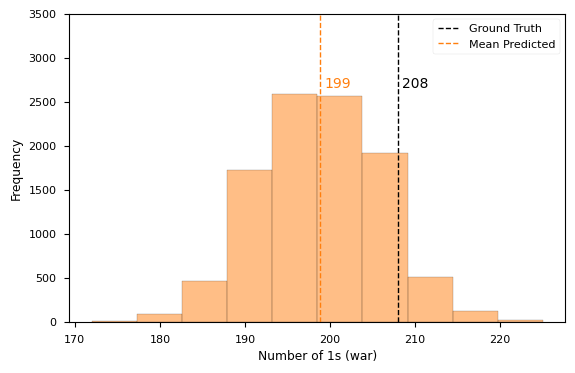

In [ ]:
# Set plots style
plt.style.use('seaborn-v0_8-paper')

# Set the size of the chart
plt.figure(figsize=(6.4, 4))

# Count the number of 1's in each sample for predicted samples
modified_count_of_ones = [sum(sample) for sample in predicted_samples]

default_colours = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Calculate means for both distributions
mean_original = np.sum(ground_truth)
mean_predicted = np.mean(modified_count_of_ones)

# Plot histograms of the counts of 1's
# plt.hist(original_count_of_ones, bins=range(0, 51, 1), alpha=0.5, label='Original Sampling', edgecolor='black')
plt.hist(modified_count_of_ones, alpha=0.5, edgecolor='black', color=default_colours[1])

# Add vertical lines for the means
plt.axvline(mean_original, label='Ground Truth', color='black', linestyle='dashed', linewidth=1)
plt.axvline(mean_predicted, label='Mean Predicted', color=default_colours[1], linestyle='dashed', linewidth=1)

# Add text for the means
plt.text(mean_original+0.5, plt.ylim()[1] * 0.98, f'{mean_original:.0f}', color='black')
plt.text(mean_predicted+0.5, plt.ylim()[1] * 0.98, f'{mean_predicted:.0f}', color=default_colours[1])

# Add titles and labels
#plt.title('Predictions distribution')
plt.xlabel('Number of 1s (war)')
plt.ylabel('Frequency')
# plt.xticks(range(0, 51, 5))
plt.yticks(range(0, 3600, 500))

# Add legend
plt.legend(loc='upper right')

plt.savefig(
    'report_charts/bias_correction_hist1.pdf',
    bbox_inches='tight',
)

# Show the plot
plt.show()

## Correcting for the bias

In [ ]:
# Using conditional probabilities to correct for bias
corrected_samples = []

for predicted_labels in predicted_samples:
    corrected_labels = []
    for label in predicted_labels:
        if label == 1:  # Predicted war
            corrected_label = np.random.choice(
                [1, 0], p=[precision, 1 - precision]
            )
        else:  # Predicted not war
            corrected_label = np.random.choice(
                [0, 1], p=[negative_predictive_value, 1 - negative_predictive_value]
            )
        corrected_labels.append(corrected_label)
    
    corrected_labels = np.array(corrected_labels)
    corrected_samples.append(corrected_labels)

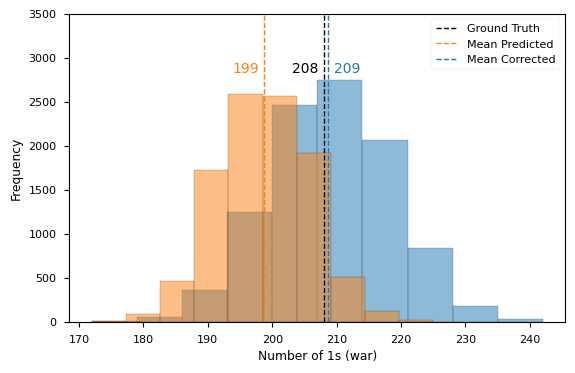

In [ ]:
plt.figure(figsize=(6.4, 4))

# Count the number of 1's in each sample for predicted samples
modified_count_of_ones = [sum(sample) for sample in predicted_samples]
corrected_count_of_ones = [np.sum(sample) for sample in corrected_samples]

# Calculate mean
mean_corrected = np.mean(corrected_count_of_ones)
mean_original = np.sum(ground_truth)
mean_predicted = np.mean(modified_count_of_ones)

default_colours = plt.rcParams['axes.prop_cycle'].by_key()['color']


# Plot histograms of the counts of 1's
plt.hist(corrected_count_of_ones, alpha=0.5, edgecolor='black',color=default_colours[0] )
plt.hist(modified_count_of_ones, alpha=0.5, edgecolor='black', color=default_colours[1] )

# Add vertical lines for the means
plt.axvline(mean_original, label='Ground Truth', color='black', linestyle='dashed', linewidth=1)
plt.axvline(mean_predicted, label='Mean Predicted', color=default_colours[1], linestyle='dashed', linewidth=1)
plt.axvline(mean_corrected, label='Mean Corrected', color=default_colours[0], linestyle='dashed', linewidth=1)

# Add text for the means
plt.text(mean_original -5, plt.ylim()[1] * 0.98, f'{mean_original:.0f}')
plt.text(mean_predicted -5, plt.ylim()[1] * 0.98, f'{mean_predicted:.0f}', color=default_colours[1])
plt.text(mean_corrected +1, plt.ylim()[1] * 0.98, f'{mean_corrected:.0f}', color=default_colours[0])

# Add titles and labels
#plt.title('Predictions distribution')
plt.xlabel('Number of 1s (war)')
plt.ylabel('Frequency')
# plt.xticks(range(0, 51, 5))
plt.yticks(range(0, 3600, 500))

# Add legend
plt.legend(loc='upper right')

plt.savefig(
    'report_charts/bias_correction_hist2.pdf',
    bbox_inches='tight',
)

# Show the plot
plt.show()

## Correcting real predictions

In [5]:
# Load predictions
a3_preds = pd.read_csv('predictions/atres_predictions.csv')
la6_preds = pd.read_csv('predictions/la6_predictions.csv')
t5_preds = pd.read_csv('predictions/telecinco_predictions.csv')

In [13]:
# Create list with the different list of predictions for channels
predicted_real = [a3_preds['predicted_class'].tolist(), la6_preds['predicted_class'].tolist(), t5_preds['predicted_class'].tolist()]

# Using conditional probabilities to correct for bias
corrected_real = []

for predicted_labels in predicted_real:
    corrected_labels = []
    for label in predicted_labels:
        if label == 1:  # Predicted war
            corrected_label = np.random.choice(
                [1, 0], p=[precision, 1 - precision]
            )
        else:  # Predicted not war
            corrected_label = np.random.choice(
                [0, 1], p=[negative_predictive_value, 1 - negative_predictive_value]
            )
        corrected_labels.append(corrected_label)
    
    corrected_labels = np.array(corrected_labels)
    corrected_real.append(corrected_labels)

In [19]:
# Add new predictions to dataframe
a3_preds['corrected_preds'] = corrected_real[0]
la6_preds['corrected_preds'] = corrected_real[1]
t5_preds['corrected_preds'] = corrected_real[2]

In [6]:
# Save predictions with bias corrections
a3_preds.to_csv('predictions/a3_bias_corrected.csv', index=False)
la6_preds.to_csv('predictions/la6_bias_corrected.csv', index=False)
t5_preds.to_csv('predictions/t5_bias_corrected.csv', index=False)

## Error Bars Plot

In [91]:
# Load predictions
a3_preds = pd.read_csv('predictions/atres_predictions.csv')
la6_preds = pd.read_csv('predictions/la6_predictions.csv')
t5_preds = pd.read_csv('predictions/telecinco_predictions.csv')

a3_preds_corrected = pd.read_csv('predictions/a3_bias_corrected.csv')
la6_preds_corrected = pd.read_csv('predictions/la6_bias_corrected.csv')
t5_preds_corrected = pd.read_csv('predictions/t5_bias_corrected.csv')

In [82]:
def generate_errorbars_df(predictions, corrected):
    # Group data by year_month
    grouped = predictions.groupby('year_month')

    # Dictionary to hold the counts of class 1 for each month
    monthly_corrected_counts = defaultdict(list)

    # Iterate over each month
    for month, group in grouped:
        predicted_labels = group['predicted_class'].values
        total_count = len(predicted_labels)
        total_class_one_count = group['predicted_class'].sum()
        for _ in range(1000):
            corrected_labels = []
            for label in predicted_labels:
                if label == 1:  # Predicted war
                    corrected_label = np.random.choice([1, 0], p=[precision, 1 - precision])
                else:  # Predicted not war
                    corrected_label = np.random.choice([0, 1], p=[negative_predictive_value, 1 - negative_predictive_value])
                corrected_labels.append(corrected_label)
            corrected_count = sum(corrected_labels)
            monthly_corrected_counts[month].append(corrected_count)

    # Calculate the 10th and 90th quantiles of the corrected counts for each month
    monthly_quantiles = {month: (np.percentile(counts, 10), np.percentile(counts, 90)) for month, counts in monthly_corrected_counts.items()}
    
    
    grouped_corrected = corrected.groupby('year_month')
    # Group the original dataframe by month and calculate the required statistics
    results = []
    for month, group in grouped_corrected:
        total_count = len(group)
        total_class_one_count = group['corrected_preds'].sum()
        share_class_one = total_class_one_count / total_count
        quantile_10th, quantile_90th = monthly_quantiles[month]
        share_class_one_10th = quantile_10th / total_count
        share_class_one_90th = quantile_90th / total_count
        min_class_one_count = min(monthly_corrected_counts[month])
        max_class_one_count = max(monthly_corrected_counts[month])
        share_class_one_min = min_class_one_count / total_count
        share_class_one_max = max_class_one_count / total_count

        results.append({
            'year_month': month,
            'total_count': total_count,
            'total_class_one_count': total_class_one_count,
            'share_class_one': share_class_one,
            'count_class_one_10th': quantile_10th,
            'share_class_one_10th': share_class_one_10th,
            'count_class_one_90th': quantile_90th,
            'share_class_one_90th': share_class_one_90th,
            'min_class_one_count': min_class_one_count,
            'share_class_one_min': share_class_one_min,
            'max_class_one_count': max_class_one_count,
            'share_class_one_max': share_class_one_max
        })

    # Convert to DataFrame for easy plotting or further analysis
    results_df = pd.DataFrame(results)
    return results_df


In [83]:
a3_results = generate_errorbars_df(a3_preds, a3_preds_corrected)
la6_results = generate_errorbars_df(la6_preds, la6_preds_corrected)
t5_results = generate_errorbars_df(t5_preds, t5_preds_corrected)

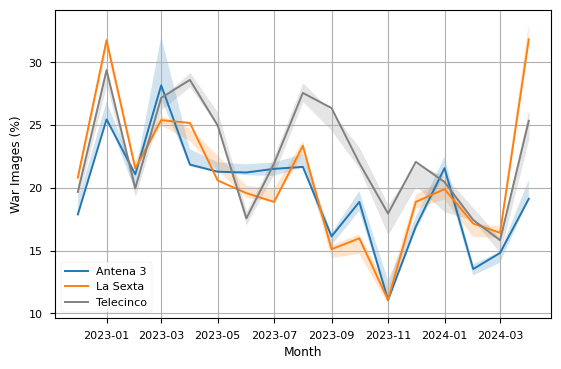

In [116]:
a3_results['year_month'] = pd.to_datetime(a3_results['year_month'])
la6_results['year_month'] = pd.to_datetime(la6_results['year_month'])
t5_results['year_month'] = pd.to_datetime(t5_results['year_month'])

# Filter out May 2024 data
a3_results_filtered = a3_results[a3_results['year_month'] != '2024-05']
la6_results_filtered = la6_results[la6_results['year_month'] != '2024-05']
t5_results_filtered = t5_results[t5_results['year_month'] != '2024-05']

# Plotting
plt.figure(figsize=(6.4, 4))

# Plot share_class_one with error area from min to max for each channel
plt.plot(a3_results_filtered['year_month'], a3_results_filtered['share_class_one'] * 100, label='Antena 3')
plt.plot(la6_results_filtered['year_month'], la6_results_filtered['share_class_one'] * 100,label='La Sexta')
plt.plot(t5_results_filtered['year_month'], t5_results_filtered['share_class_one'] * 100, label='Telecinco', color='grey')
plt.fill_between(a3_results_filtered['year_month'], a3_results_filtered['share_class_one_10th'] * 100, a3_results_filtered['share_class_one_90th'] * 100, alpha=0.2) # , label='Antena 3 Range (10th to 90th Percentile)'
plt.fill_between(la6_results_filtered['year_month'], la6_results_filtered['share_class_one_10th'] * 100, la6_results_filtered['share_class_one_90th'] * 100, alpha=0.2) # , label='La Sexta Range (10th to 90th Percentile)'
plt.fill_between(t5_results_filtered['year_month'], t5_results_filtered['share_class_one_10th'] * 100, t5_results_filtered['share_class_one_90th'] * 100, alpha=0.2, color='grey') # , label='Telecinco Range (10th to 90th Percentile)'

# Formatting the plot
plt.xlabel('Month')
plt.ylabel('War Images (%)')
# plt.title('Share of Class One with Error Area')
plt.legend()
plt.grid(True)


plt.savefig(
    'report_charts/bias_corrected_trend.pdf',
    bbox_inches='tight',
)


# Show plot
plt.show()